# __Análise de componentes principais - PCA__
### __Analisando todas as músicas coletadas__

Nessa parte do trabalho, iremos utilizar o algoritmo de análise de componentes principais conjuntamente sobre o banco de dados de músicas provenientes de três grupos: 

__1. Grupo 1:__ músicas famosas no TikTok, sendo esta base obtida do kaggle.

__2. Grupo 2:__ músicas famosas porém não populares na plataforma do TikTok, tendo sido essas músicas coletadas pelo grupo.

__2. Grupo 3:__ músicas não famosas, e que também não são populares na plataforma do TikTok, coletadas pelo grupo.


In [23]:
#importando bibliotecas
import numpy as np
import pandas as pd

import math

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
#importando as bases de dados
df_pop_tiktok = pd.read_csv('../data/numeric_columns.csv')
df_nao_pop = pd.read_csv('../data/nao_populares_rock_numeric.csv')


#pegando as 100 primeiras musicas da base de populares
df_pop_tiktok = df_pop_tiktok.iloc[0:100, :]

#coluna p/distinguir origem da musica 
df_pop_tiktok['base'] = 1
df_nao_pop['base'] = 2

#juntando as bases
df = pd.concat([df_pop_tiktok, df_nao_pop], ignore_index=True)

#removendo algumas colunas
del df['duration']
del df['mode']

df.head()

,track_id,popularity,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_mins,release_year,base
0,6kVuF2PYLuvl9T85XjNbaO,28,0.597,0.800,1,-5.423,0.3120,0.0461,0.000000,0.1800,0.565,155.932,5.036433,2011,1
1,1RGIjMFMgJxkZHMDXVYzOJ,75,0.832,0.391,8,-8.504,0.0628,0.0564,0.000000,0.2240,0.436,104.961,3.980000,2007,1
2,1dIWPXMX4kRHj6Dt2DStUQ,76,0.571,0.767,2,-5.160,0.2870,0.3360,0.000000,0.0809,0.605,93.421,2.694733,2020,1
3,4QVS8YCpK71R4FsxSMCjhP,72,0.548,0.839,6,-2.371,0.0644,0.1350,0.000000,0.1020,0.314,98.932,3.638250,2018,1
4,7BoobGhD4x5K96Me0hqC8Q,89,0.855,0.463,3,-7.454,0.0367,0.2170,0.000018,0.3470,0.866,102.931,2.046200,2021,1


In [25]:
#tranformando o df em matrix
db_matrix = np.matrix(df.iloc[:, 2:14])
db_matrix

matrix([[5.97000000e-01, 8.00000000e-01, 1.00000000e+00, ...,
         1.55932000e+02, 5.03643333e+00, 2.01100000e+03],
        [8.32000000e-01, 3.91000000e-01, 8.00000000e+00, ...,
         1.04961000e+02, 3.98000000e+00, 2.00700000e+03],
        [5.71000000e-01, 7.67000000e-01, 2.00000000e+00, ...,
         9.34210000e+01, 2.69473333e+00, 2.02000000e+03],
        ...,
        [5.56000000e-01, 7.62000000e-01, 0.00000000e+00, ...,
         1.11155000e+02, 4.37085000e+00, 2.01700000e+03],
        [5.92000000e-01, 7.40000000e-01, 8.00000000e+00, ...,
         1.16017000e+02, 3.71621667e+00, 2.00100000e+03],
        [5.62000000e-01, 8.91000000e-01, 1.00000000e+00, ...,
         1.32569000e+02, 4.77888333e+00, 1.99200000e+03]])

In [26]:
from sklearn.preprocessing import StandardScaler

#normalizando os dados
db_matrix = np.asarray(db_matrix)
matrix_norm = StandardScaler().fit_transform(db_matrix)

#agora a média de todas as colunas é praticamente zero
matrix_norm.mean(0)

array([-2.13162821e-16, -3.37507799e-16,  1.33226763e-17,  1.19904087e-16,
        0.00000000e+00,  1.77635684e-16, -3.55271368e-17,  5.32907052e-17,
       -2.13162821e-16,  1.42108547e-16,  4.26325641e-16, -8.10018719e-15])

In [27]:
matrix_norm = np.asarray(matrix_norm)

In [28]:
#importando o módulo de PCA
from sklearn.decomposition import PCA

#primeiro, vamos observar todos componentes principais 
pca = PCA(n_components = 12)

In [29]:
#rodando o PCA
pca.fit(matrix_norm)

PCA(n_components=12)

In [30]:
#componentes obtidos
np.round(pca.explained_variance_ratio_,3)

array([0.239, 0.146, 0.105, 0.089, 0.084, 0.076, 0.072, 0.063, 0.045,
       0.038, 0.025, 0.018])

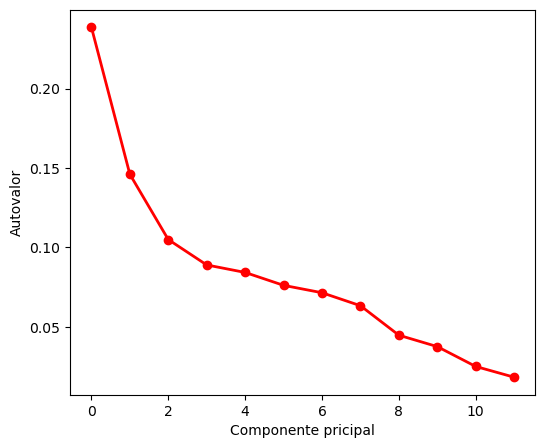

In [31]:
fig = plt.figure(figsize=(6, 5))

plt.plot(pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.xlabel('Componente pricipal')
plt.ylabel('Autovalor')

plt.show()

In [32]:
#soma cumulativa dos componentes
pca.explained_variance_ratio_.cumsum()

array([0.23867144, 0.38480174, 0.48979838, 0.57881651, 0.66310859,
       0.73928723, 0.81080745, 0.87416348, 0.91895333, 0.95655649,
       0.98166732, 1.        ])

A partir desse resultado, concluímos que pelo menos 5 componentes principais devem ser usadas para explicar cerca de 66% da variabilidade dos dados.

In [34]:
import plotly.express as px

#visualizando resultados

components = pca.fit_transform(matrix_norm)
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(2),
    color=df["base"]
)
fig.update_traces(diagonal_visible=False)
fig.show()

Há uma diferença clara entre os grupos 1 e 2 nos gráficos plotados. O grupo 1, que está em azul, são as músicas populares no TikTok, já os pontos amarelos são as músicas não populares. A partir desse resultado podemos inferir que existe sim uma diferença entre as músicas que fazem sucesso no tiktok e as que não fazem. Agora vamos observar os pesos das variáveis nas componentes principais, para poder entender melhor de onde vem essa diferença.

In [44]:
print("As colunas usadas no PCA são:", list(df.iloc[:,2:14].columns.values))

As colunas usadas no PCA são: ['danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_mins', 'release_year']


In [45]:
print("Primeira componente principal:" , np.round(pca.components_[0, :],3))
print("Segunda componente principal:" , np.round(pca.components_[1, :],3))
print("Terceira componente principal:" , np.round(pca.components_[2, :],3))

Primeira componente principal: [-0.493  0.33   0.059  0.117 -0.324 -0.239  0.143  0.279 -0.206  0.238
  0.413 -0.317]
Segunda componente principal: [-0.159 -0.515 -0.107 -0.648 -0.1    0.239 -0.158 -0.011 -0.22   0.065
  0.136 -0.338]
Terceira componente principal: [ 0.113  0.011  0.51  -0.087 -0.303 -0.068  0.038 -0.368  0.542 -0.201
  0.146 -0.362]


A primeira componente tem como variável de maior peso a __dançabilidade.__

A segunda componente tem como variável de maior peso a __energia.__

A terceira componente tem como variável de maior peso a __valência.__

O que isso sugere? (responder ao finalizar análise)